# Compare the CCLM run and other products 

In [1]:
import numpy as np
import xarray as xr

import cartopy.crs as ccrs
import cartopy.feature as cfeature
import cartopy.util as cutil

import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import cartopy.crs as ccrs
print(5)
import cartopy.feature
import matplotlib as mpl

5


<frozen importlib._bootstrap>:219: UserWarning: PROJ 8+ is required. Current version: 7.0.1


## Functions:

In [68]:
def plot_maps(name, val,cmap, minn, maxx, nn, rlat,rlon):
    
    fig = plt.figure('1')
    fig.set_size_inches(14, 10)
    pc = ccrs.PlateCarree()
    rp = ccrs.RotatedPole(pole_longitude= pol_lon,
                          pole_latitude= pol_lat,
                          globe=ccrs.Globe(semimajor_axis=6370000,
                                           semiminor_axis=6370000))
    ax = plt.axes(projection=rp)
    ax.coastlines('50m', linewidth=0.8)
    ax.add_feature(cartopy.feature.BORDERS)
    ax.add_feature(cartopy.feature.OCEAN,
                   edgecolor='black', zorder=0,
                   linewidth=0.8, alpha=.7)
    ax.add_feature(cartopy.feature.BORDERS,
                   edgecolor='black', zorder=0,
                   linewidth=0.8, alpha=.7)
    ax.add_feature(cartopy.feature.LAND, zorder=0,
                   linewidth=0.8, alpha=.7)
    
    v =  np.linspace(minn,maxx , nn, endpoint=True)
    cmap = cmap
    # extract all colors from the .jet map
    cmaplist = [cmap(i) for i in range(cmap.N)]
    #   # force the first color entry to be grey
    #   cmaplist[0] = (.5, .5, .5, 1.0)
    # create the new map
    cmap = mpl.colors.LinearSegmentedColormap.from_list('Custom cmap', cmaplist, cmap.N)
    norm = mpl.colors.BoundaryNorm(v, cmap.N)
    rlons, rlats = np.meshgrid(rlon, rlat)
    cs = plt.pcolor(rlons, rlats, val.squeeze(), cmap=cmap, zorder=1,norm=norm,linewidth=0,rasterized=True,\
    shading="auto")
    # https://journals.ametsoc.org/view/journals/hydr/15/1/jhm-d-13-011_1.xml
    # Peshawar
    lon0 = -2.6579151 # 71.5249
    lat0 = -13.751357#34.0151
    plt.plot(lon0,lat0,"*", markersize=30, markerfacecolor="black", markeredgecolor="cyan")
    ax.gridlines( draw_labels=True,linewidth=1, color='black', alpha=0.5, linestyle='--')
    cax = fig.add_axes([ax.get_position().x1+0.05,ax.get_position().y0,0.02,ax.get_position().height])
    cb = plt.colorbar(cs, cax=cax)
    #ax.gridlines( draw_labels=True,dms=True,linewidth=2, color='black', alpha=0.5, linestyle='--')
    #cb.set_label('total precip [mm/day]', fontsize=20)
    cb.ax.tick_params(labelsize=20)
    
    plt.savefig(name, format='png', bbox_inches='tight')
    plt.close()

def plot_contour_zg_rh(name, val1, val2,cmap, minn, maxx, nn, rlat,rlon):
    
    fig = plt.figure('1')
    fig.set_size_inches(14, 10)
    pc = ccrs.PlateCarree()
    rp = ccrs.RotatedPole(pole_longitude= pol_lon,
                          pole_latitude= pol_lat,
                          globe=ccrs.Globe(semimajor_axis=6370000,
                                           semiminor_axis=6370000))
    ax = plt.axes(projection=rp)
    ax.coastlines('50m', linewidth=0.8)
    ax.add_feature(cartopy.feature.BORDERS)
    ax.add_feature(cartopy.feature.OCEAN,
                   edgecolor='black', zorder=0,
                   linewidth=0.8, alpha=.7)
    ax.add_feature(cartopy.feature.BORDERS,
                   edgecolor='black', zorder=0,
                   linewidth=0.8, alpha=.7)
    ax.add_feature(cartopy.feature.LAND, zorder=0,
                   linewidth=0.8, alpha=.7)
    
    v =  np.linspace(minn,maxx , nn, endpoint=True)
    cmap = cmap
    # extract all colors from the .jet map
    cmaplist = [cmap(i) for i in range(cmap.N)]
    #   # force the first color entry to be grey
    #   cmaplist[0] = (.5, .5, .5, 1.0)
    # create the new map
    cmap = mpl.colors.LinearSegmentedColormap.from_list('Custom cmap', cmaplist, cmap.N)
    norm = mpl.colors.BoundaryNorm(v, cmap.N)
    rlons, rlats = np.meshgrid(rlon, rlat)
    CS1 = plt.contour(rlons, rlats, val1.squeeze(), 9,colors="black", linewidths=4)
    plt.clabel(CS1, fontsize=15,fmt='%d')
    cs = plt.pcolor(rlons, rlats, val2.squeeze(), cmap=cmap, zorder=1,norm=norm,linewidth=0,rasterized=True,\
    shading="auto")
    # https://journals.ametsoc.org/view/journals/hydr/15/1/jhm-d-13-011_1.xml
    # Peshawar
    lon0 = -2.6579151 # 71.5249
    lat0 = -13.751357#34.0151
    plt.plot(lon0,lat0,"*", markersize=30, markerfacecolor="black", markeredgecolor="cyan")
    ax.gridlines( draw_labels=True,linewidth=1, color='black', alpha=0.5, linestyle='--')
    cax = fig.add_axes([ax.get_position().x1+0.05,ax.get_position().y0,0.02,ax.get_position().height])
    cb = plt.colorbar(cs, cax=cax)
    #ax.gridlines( draw_labels=True,dms=True,linewidth=2, color='black', alpha=0.5, linestyle='--')
    #cb.set_label('total precip [mm/day]', fontsize=20)
    cb.ax.tick_params(labelsize=20)
    
    plt.savefig(name, format='png', bbox_inches='tight')
    plt.close()
    
def plot_exceedance(data, **kwargs):
    
    sorted_df = np.sort(data)
    samples = len(sorted_df)
    exceedance = [1-(x/samples) for x in range(1, samples + 1)]
    ax=plt.gca()
    ax.semilogy(sorted_df, exceedance, **kwargs)

## read the datasets for 28th and 29th of July 2010 for Pakistan 

In [73]:
############### ERAInterim ############################
fname1 = "ERAInterim_pakistan_flood_zoom.nc"
#--  open file and read variables
f1    =  xr.open_dataset(fname1)
var1  =  f1.variables["tp"][:]
print(var1.shape)
lat2d = f1.variables["lat"][:,:]
lon2d = f1.variables["lon"][:,:]
rlat = f1.variables['rlat'][:]
rlon = f1.variables['rlon'][:]
f1.close()
############### CCLM     ##############################
fname1 = "cclm_pakistan_flood_zoom.nc"
#--  open file and read variables
f1    =  xr.open_dataset(fname1)
var2  =  f1.variables["TOT_PREC"][:]
f1.close()

############### CHIRPS     ##############################
fname1 = "chirps_pakistanm_flood_zoom.nc"
#--  open file and read variables
f1    =  xr.open_dataset(fname1)
var3  =  f1.variables["precip"][:]
f1.close()
############### CHELSA     ##############################
fname1 = "CHELSA_pakistan_flood_zoom.nc"
#--  open file and read variables
f1    =  xr.open_dataset(fname1)
var4  =  f1.variables["pr"][:]
f1.close()
############### TRMM     ##############################
fname1 = "TRMM_DAILY_20100728_zoom.nc"
#--  open file and read variables
f1    =  xr.open_dataset(fname1)
var51  =  f1.variables["precipitation"][:]
f1.close()
fname1 = "TRMM_DAILY_20100729_zoom.nc"
#--  open file and read variables
f1    =  xr.open_dataset(fname1)
var52  =  f1.variables["precipitation"][:] 
f1.close()
############### ERA5     ##############################
fname1 = "ERA5_pakistan_flood_zoom.nc"
#--  open file and read variables
f1    =  xr.open_dataset(fname1)
var6  =  f1.variables["pr"][:]
f1.close()
############### PGF     ##############################
fname1 = "pgfv3_pakistan_flood_zoom.nc"
#--  open file and read variables
f1    =  xr.open_dataset(fname1)
var7  =  f1.variables["pr"][:]
f1.close()

############### CMORPHV1     ##############################
fname1 = "CMORPHV1_flood_pakistan_zoom.nc"
#--  open file and read variables
f1    =  xr.open_dataset(fname1)
var8  =  f1.variables["cmorph"][:]
f1.close()

######################## NAMELIST #####################
pol_lon=-105.36
pol_lat=42.18
minn=0
maxx=150
nn=15
N=50


(2, 61, 52)


In [74]:
########## _2010-07-28
plot_maps("./figs/ERAInterim_2010-07-28.png",var1[0,:,:],plt.cm.gist_ncar_r,0,300,31,rlat,rlon)
plot_maps("./figs/CCLM_2010-07-28.png",var2[0,:,:],plt.cm.gist_ncar_r,0,300,31,rlat,rlon)
plot_maps("./figs/CHIRPS_2010-07-28.png",var3[0,:,:],plt.cm.gist_ncar_r,0,300,31,rlat,rlon)
plot_maps("./figs/CHELSA_2010-07-28.png",var4[0,:,:],plt.cm.gist_ncar_r,0,300,31,rlat,rlon)
plot_maps("./figs/TRMM_2010-07-28.png",var51.T,plt.cm.gist_ncar_r,0,300,31,rlat,rlon)
plot_maps("./figs/ERA5_2010-07-28.png",var6[0,:,:],plt.cm.gist_ncar_r,0,300,31,rlat,rlon)
plot_maps("./figs/PGFV3_2010-07-28.png",var7[0,:,:],plt.cm.gist_ncar_r,0,300,31,rlat,rlon)
plot_maps("./figs/CMORPH_2010-07-28.png",var8[0,:,:],plt.cm.gist_ncar_r,0,300,31,rlat,rlon)

######### _2010-07-29
plot_maps("./figs/ERAInterim_2010-07-29.png",var1[1,:,:],plt.cm.gist_ncar_r,0,300,31,rlat,rlon)
plot_maps("./figs/CCLM_2010-07-29.png",var2[1,:,:],plt.cm.gist_ncar_r,0,300,31,rlat,rlon)
plot_maps("./figs/CHIRPS_2010-07-29.png",var3[1,:,:],plt.cm.gist_ncar_r,0,300,31,rlat,rlon)
plot_maps("./figs/CHELSA_2010-07-29.png",var4[1,:,:],plt.cm.gist_ncar_r,0,300,31,rlat,rlon)
plot_maps("./figs/TRMM_2010-07-29.png",var52.T,plt.cm.gist_ncar_r,0,300,31,rlat,rlon)
plot_maps("./figs/ERA5_2010-07-29.png",var6[1,:,:],plt.cm.gist_ncar_r,0,300,31,rlat,rlon)
plot_maps("./figs/PGFV3_2010-07-29.png",var7[1,:,:],plt.cm.gist_ncar_r,0,300,31,rlat,rlon)
plot_maps("./figs/CMORPH_2010-07-29.png",var8[1,:,:],plt.cm.gist_ncar_r,0,300,31,rlat,rlon)


## Plot the CFD 

### Probabilities of exceedence (1-CDF) for 2010-07-28

max of CHIRPS =  <xarray.Variable ()>
array(381.0561, dtype=float32) max of CCLM =  <xarray.Variable ()>
array(262.74118, dtype=float32) max of ERAInterim =  <xarray.Variable ()>
array(83.607414, dtype=float32)


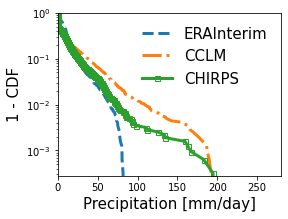

In [77]:
plt.subplots(figsize=(4,3))
var = var1[0,:,:].values.reshape(-1)
var = var[var>-1]
plot_exceedance(var, linestyle='dashed', lw=3,label="ERAInterim")
####################################################################
#var = var4[0,:,:].values.reshape(-1)
#var = var[var>-1]
#plot_exceedance(var,  linestyle='dotted', lw=3, label="CHELSA")
####################################################################
var = var2[0,:,:].values.reshape(-1)
var = var[var>-1]
plot_exceedance(var, linestyle='dashdot', lw=3, label="CCLM")
################################################################
var = var3[0,:,:].values.reshape(-1)
var = var[var>-1]
plot_exceedance(var, marker="s", lw=3,
                markersize=5, markerfacecolor="none" , label="CHIRPS")
######################################################################
#var = var51.values.reshape(-1)
#var = var[var>-1]
#plot_exceedance(var, marker="d",
##                markersize=5, markerfacecolor="none", label="TRMM")
#######################################################################
#var = var6[0,:,:].values.reshape(-1)
#var = var[var>-1]
#plot_exceedance(var, lw=3,label="ERA5")
#######################################################################
#var = var7[0,:,:].values.reshape(-1)
#var = var[var>-1]
#plot_exceedance(var, lw=3, marker="o",
#                markersize=5, markerfacecolor="none",label="PGFV3")
#
######################################################################
#var = var8[0,:,:].values.reshape(-1)
#var = var[var>-1]
#plot_exceedance(var, lw=3, marker="x",
#                markersize=5, markerfacecolor="none",label="CMORPHV1")
#
plt.legend(frameon=False, fontsize=15)
plt.xlim(0,280)
plt.ylim(0.00028,1)
plt.xlabel("Precipitation [mm/day]", fontsize=15)
plt.ylabel("1 - CDF", fontsize=15);
plt.savefig('figs/p_of_exceedence_28.png', bbox_inches='tight', dpi=300)
#### Print max of CHIRPS, CCLM, ERAInterim 
print('max of CHIRPS = ',np.max(var3[0,:,:]), 'max of CCLM = ',np.max(var2[0,:,:]),
      'max of ERAInterim = ', np.max(var1[0,:,:]))

### Probabilities of exceedence (1-CDF) for 2010-07-29

max of CHIRPS =  <xarray.Variable ()>
array(310.2118, dtype=float32) max of CCLM =  <xarray.Variable ()>
array(370.1376, dtype=float32) max of ERAInterim =  <xarray.Variable ()>
array(181.66895, dtype=float32)


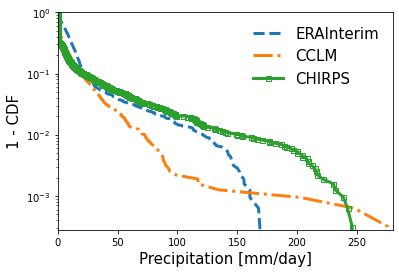

In [80]:
plt.subplots(figsize=(6,4))
var = var1[1,:,:].values.reshape(-1)
var = var[var>-1]
plot_exceedance(var, linestyle='dashed', lw=3,label="ERAInterim")
####################################################################
#var = var4[1,:,:].values.reshape(-1)
#var = var[var>-1]
#plot_exceedance(var,  linestyle='dotted', lw=3, label="CHELSA")
###################################################################
var = var2[1,:,:].values.reshape(-1)
var = var[var>-1]
plot_exceedance(var, linestyle='dashdot', lw=3, label="CCLM")
################################################################
var = var3[1,:,:].values.reshape(-1)
var = var[var>-1]
plot_exceedance(var, marker="s", lw=3,
                markersize=5, markerfacecolor="none" , label="CHIRPS")
#####################################################################
#var = var52.values.reshape(-1)
#var = var[var>-1]
#plot_exceedance(var, marker="d",
#                markersize=5, markerfacecolor="none", label="TRMM")
#######################################################################
#var = var6[1,:,:].values.reshape(-1)
#var = var[var>-1]
#plot_exceedance(var, lw=3,label="ERA5")
#######################################################################
#var = var7[1,:,:].values.reshape(-1)
#var = var[var>-1]
#plot_exceedance(var, lw=3, marker="o",
#                markersize=5, markerfacecolor="none",label="PGFV3")
#######################################################################
#var = var8[1,:,:].values.reshape(-1)
#var = var[var>-1]
#plot_exceedance(var, lw=3, marker="x",
#                markersize=5, markerfacecolor="none",label="CMORPHV1")
#

plt.legend(frameon=False, fontsize=15)

plt.xlim(0,280)
plt.ylim(0.00028,1)
plt.xlabel("Precipitation [mm/day]", fontsize=15)
plt.ylabel("1 - CDF", fontsize=15);
plt.savefig('figs/p_of_exceedence_29.png', bbox_inches='tight', dpi=300)
#### Print max of CHIRPS, CCLM, ERAInterim 
print('max of CHIRPS = ',np.max(var3[1,:,:]), 'max of CCLM = ',np.max(var2[1,:,:]),
      'max of ERAInterim = ', np.max(var1[1,:,:]))

## Get station data of Peshawar 

In [1]:
import matplotlib.pyplot as plt
from get_station_data import ghcnd
from get_station_data.util import nearest_stn

In [3]:
# load station data 
stn_md = ghcnd.get_stn_metadata()


In [4]:
london_lon_lat = 71.5249, 34.0151
my_stns = nearest_stn(stn_md, 
                        london_lon_lat[0], london_lon_lat[1], 
                        n_neighbours=1 )
#my_stns['country']=[x[0:3] for x in my_stns.station]
#my_stns_pkm = my_stns[my_stns['country']=='PKM']
#my_stns_pkm.drop(columns="country", inplace=True)
#my_stns_pkm

In [5]:
df = ghcnd.get_data(my_stns)
df.head()


,station,year,month,day,element,value,mflag,qflag,sflag,date,lon,lat,elev,name
0,PKM00041530,1957,7,1,TMAX,37.8,,,S,1957-07-01,71.515,33.994,353.0,PESHAWAR INTL
1,PKM00041530,1957,7,2,TMAX,39.4,,,S,1957-07-02,71.515,33.994,353.0,PESHAWAR INTL
2,PKM00041530,1957,7,3,TMAX,41.1,,,S,1957-07-03,71.515,33.994,353.0,PESHAWAR INTL
3,PKM00041530,1957,7,4,TMAX,NaN,,,,1957-07-04,71.515,33.994,353.0,PESHAWAR INTL
4,PKM00041530,1957,7,5,TMAX,45.6,,,S,1957-07-05,71.515,33.994,353.0,PESHAWAR INTL


In [6]:
#df['country']=[x[0:3] for x in df.station]

In [7]:
#df.head()

In [8]:
var = 'PRCP'   # precipitation
df = df[ (df['element'] == var)]

### Tidy up columns
df = df.rename(index=str, columns={"value": var})
df = df.drop(['element'], axis=1)

df.tail()

,station,year,month,day,PRCP,mflag,qflag,sflag,date,lon,lat,elev,name
72783,PKM00041530,2023,3,27,NaN,,,,2023-03-27,71.515,33.994,353.0,PESHAWAR INTL
72784,PKM00041530,2023,3,28,NaN,,,,2023-03-28,71.515,33.994,353.0,PESHAWAR INTL
72785,PKM00041530,2023,3,29,NaN,,,,2023-03-29,71.515,33.994,353.0,PESHAWAR INTL
72786,PKM00041530,2023,3,30,NaN,,,,2023-03-30,71.515,33.994,353.0,PESHAWAR INTL
72787,PKM00041530,2023,3,31,NaN,,,,2023-03-31,71.515,33.994,353.0,PESHAWAR INTL


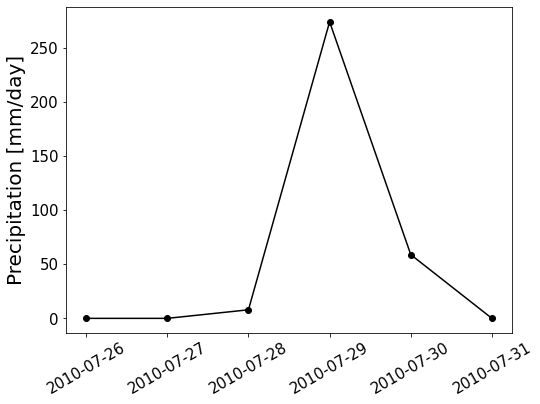

In [15]:
plt.subplots(figsize=(8,6))
plt.plot(df[(df.year==2010)].date[206:212],df[(df.year==2010)].PRCP[206:212],'k-o', label="Peshawar")
#plt.plot(df.date,df.PRCP,'k-o')
# max of the domain 
#plt.plot(4,381.0561,'s' )
#plt.plot(4,262.74118,'d' )
#plt.plot(4,83.607414,'p' )



#plt.plot(df[(df.year==2010)].date[209],310.2118,'s' ,label="CHRIPS")
#plt.plot(df[(df.year==2010)].date[209],370.1376,'d' ,label="CCLM")
#plt.plot(df[(df.year==2010)].date[209],181.66895,'p' ,label="ERAInterim")

plt.xticks(rotation = 30, fontsize=15)
plt.yticks( fontsize=15)
plt.ylabel("Precipitation [mm/day]", fontsize=20)
#plt.legend(fontsize=15)
plt.savefig('figs/Peshawar.png', bbox_inches='tight', dpi=300)

In [ ]:
import pandas as pd


import plotly.express as px

fig = px.scatter_mapbox(my_stns, lat="lat", lon="lon", hover_name="name", hover_data=["name", "elev"],
                        color_discrete_sequence=["fuchsia"], zoom=3, height=300)
fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

## Dynamical forcings for this T500 and RH and Wind!!!

In [40]:
############### READ dynamics ############################
fname1 = "2010-07_dynamical.nc"
#--  open file and read variables
f1    =  xr.open_dataset(fname1)
ZG500  =  f1.variables["FI"][:,1,:,:].squeeze() / 9.80665 # devided by g0
RH500  =  f1.variables["RELHUM"][:,1,:,:].squeeze()
T500   =  f1.variables["T"][:,1,:,:].squeeze() 
lat2d = f1.variables["lat"][:,:]
lon2d = f1.variables["lon"][:,:]
rlat = f1.variables['rlat'][:]
rlon = f1.variables['rlon'][:]

f1.close()

In [69]:
plot_contour_zg_rh("./figs/dynamics_zg_rh.png",ZG500, RH500,plt.cm.jet,0,100,21,rlat,rlon)


In [72]:
plot_maps("./figs/dynamics_T.png",T500,plt.cm.jet,250,280,31,rlat,rlon)


## Plot for the presentation comparing GCM and RCM 

In [22]:
#-- Create the color mesh plot:
fname1 = "ERAInterim_pakistan_flood_daysum.nc"
#--  open file and read variables
f1    =  xr.open_dataset(fname1)
var1  =  f1.variables["tp"][:]*1000
print(var1.shape)
lat   =  f1.variables["latitude"][:]
lon   =  f1.variables["longitude"][:]
print(lon.shape)
dlat  =  lat[1]-lat[0]
dlon  =  lon[1]-lon[0]
#-- Add cyclic points:


fname2 = "cclm_pakistan_flood_zoom.nc"
#fname2 = "chirps_pakistanm_flood_zoom.nc"

f2    = xr.open_dataset(fname2)
var2  = f2.variables["TOT_PREC"][:]
#var2  = f2.variables["precip"][:]

lat2d = f2.variables["lat"][:,:]
lon2d = f2.variables["lon"][:,:]

nlat  = len(lat2d[:,0])
nlon  = len(lon2d[0,:])
#-- Define edges of regional data:

lon_val_lower = lon2d[0,:]
lon_val_right = lon2d[:,nlon-1]
lon_val_left  = lon2d[:,0]
lon_val_upper = lon2d[nlat-1,:]
lat_val_lower = lat2d[0,:]
lat_val_right = lat2d[:,nlon-1]
lat_val_left  = lat2d[:,0]
lat_val_upper = lat2d[nlat-1,:]

#-- Generate the data for the edges of the regional grid

line_lons = np.append([lon_val_upper], [lon_val_right[::-1]])
line_lons = np.append([line_lons], [lon_val_lower])
line_lons = np.append([line_lons], [lon_val_left])
line_lats = np.append([lat_val_upper], [lat_val_right[::-1]])
line_lats = np.append([line_lats], [lat_val_lower])
line_lats = np.append([line_lats], [lat_val_left])
polyline = np.column_stack([line_lons, line_lats])



(62, 241, 480)
(480,)


/home/fallah/anaconda3/envs/glaciers/lib/python3.8/site-packages/cartopy/mpl/geoaxes.py:1797: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  result = matplotlib.axes.Axes.pcolormesh(self, *args, **kwargs)
/home/fallah/anaconda3/envs/glaciers/lib/python3.8/site-packages/cartopy/mpl/geoaxes.py:1797: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  result = matplotlib.axes.Axes.pcolormesh(self, *args, **kwargs)
/home/fallah/anaconda3/envs/glaciers/lib/python3.8/sit

/home/fallah/anaconda3/envs/glaciers/lib/python3.8/site-packages/cartopy/mpl/geoaxes.py:1797: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  result = matplotlib.axes.Axes.pcolormesh(self, *args, **kwargs)
/home/fallah/anaconda3/envs/glaciers/lib/python3.8/site-packages/cartopy/mpl/geoaxes.py:1797: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  result = matplotlib.axes.Axes.pcolormesh(self, *args, **kwargs)
/home/fallah/anaconda3/envs/glaciers/lib/python3.8/sit

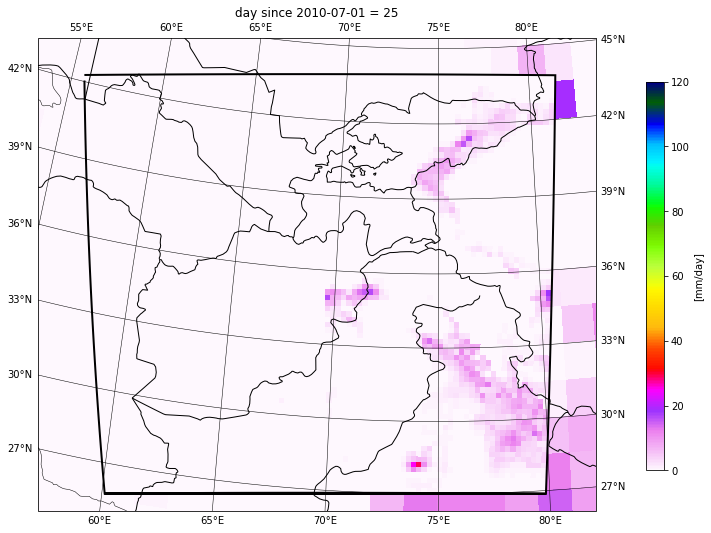

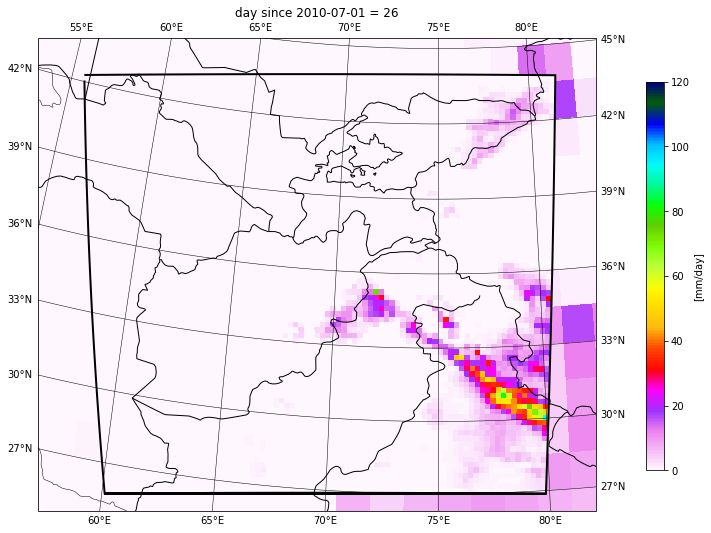

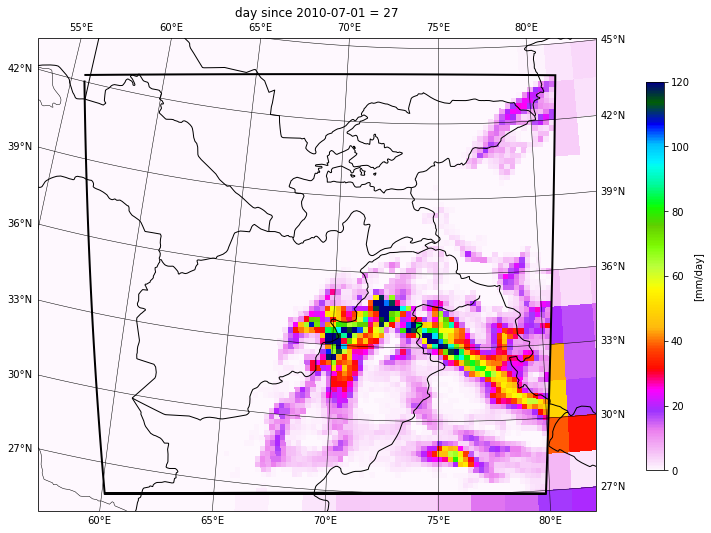

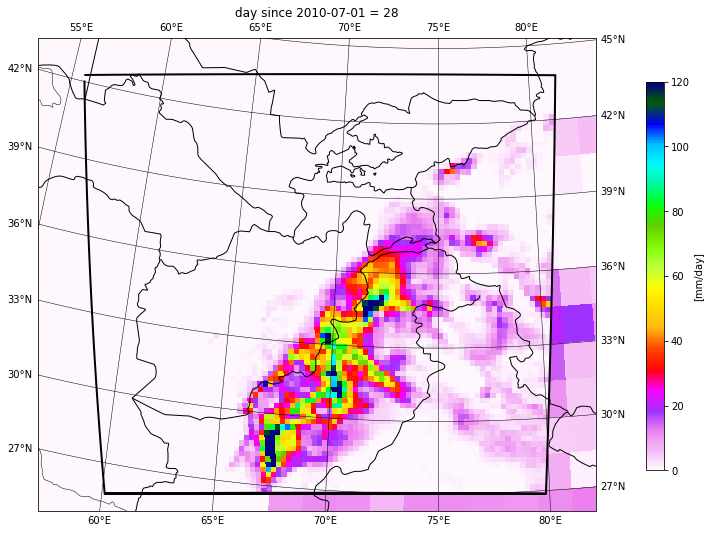

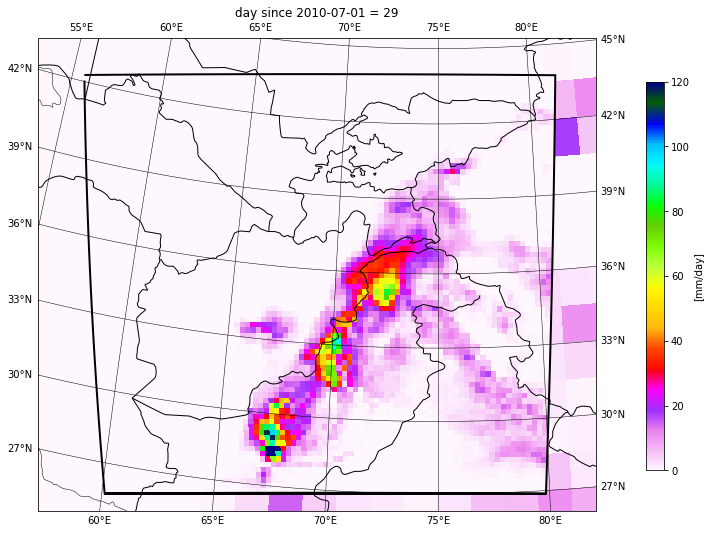

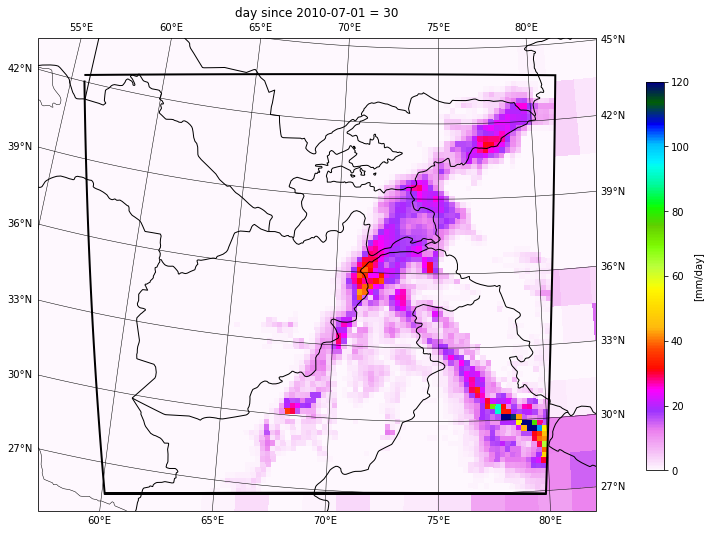

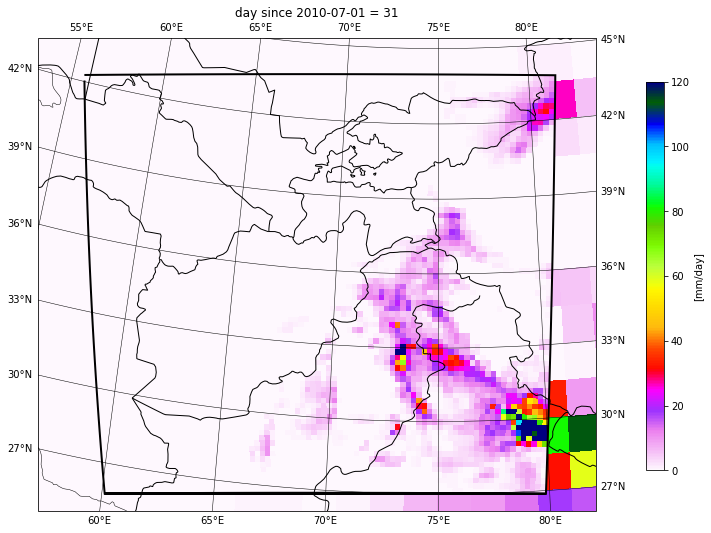

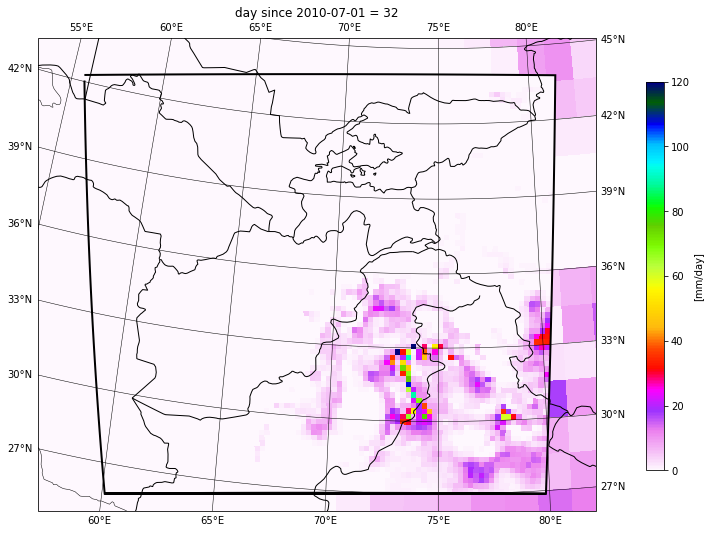

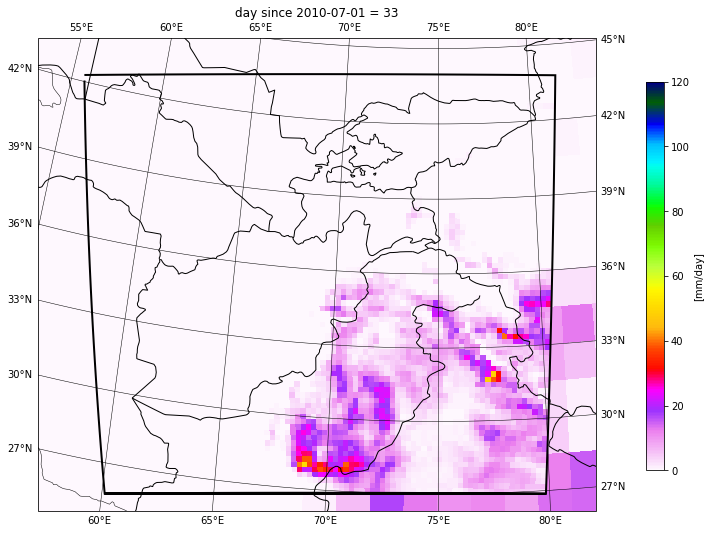

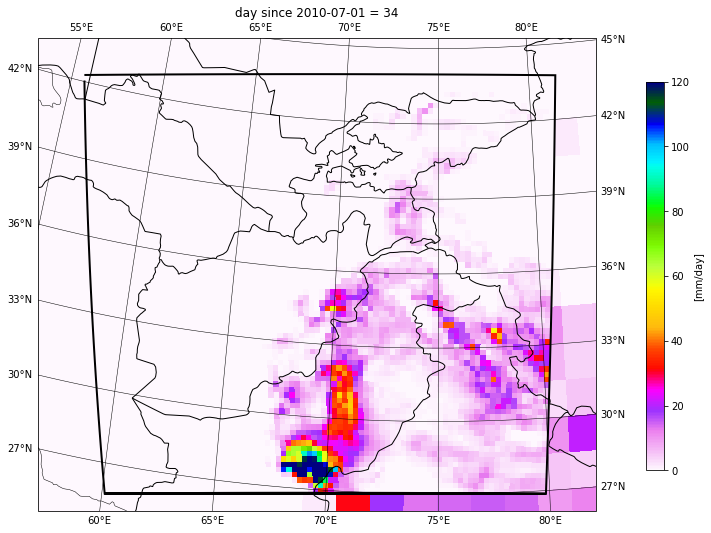

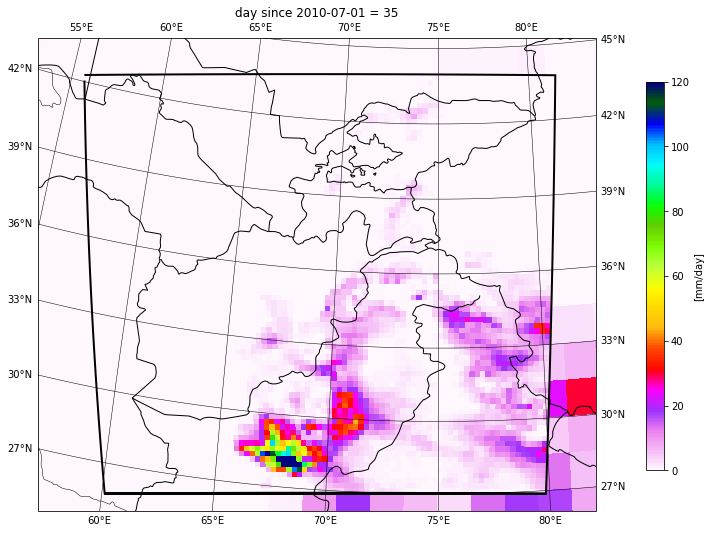

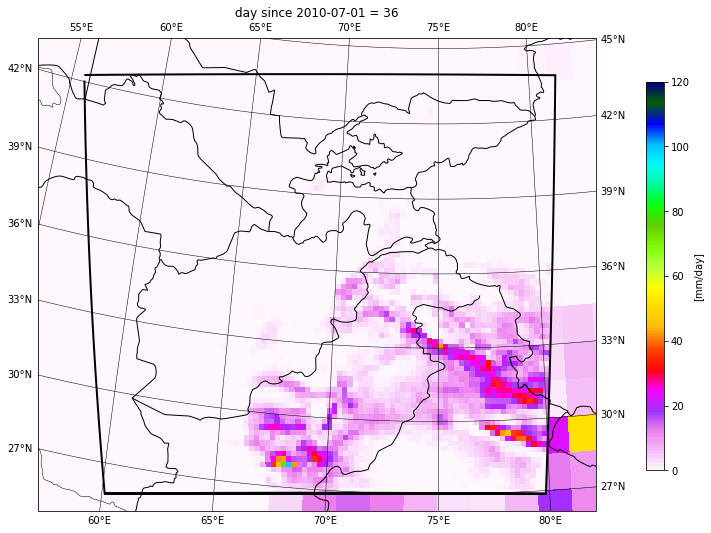

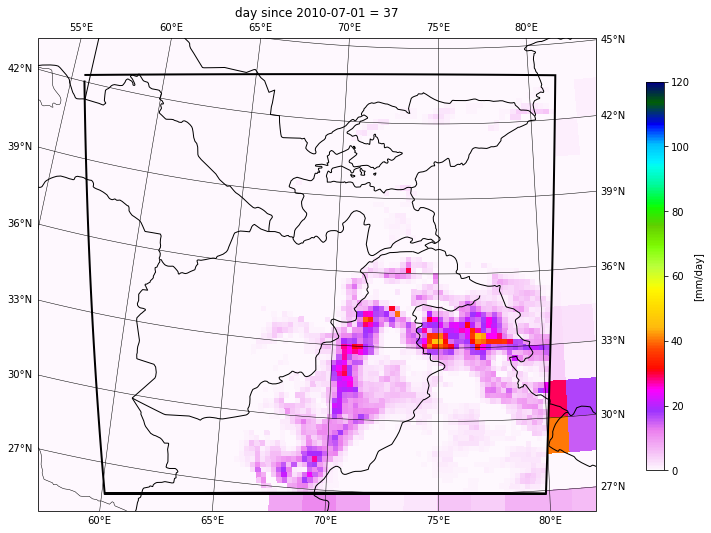

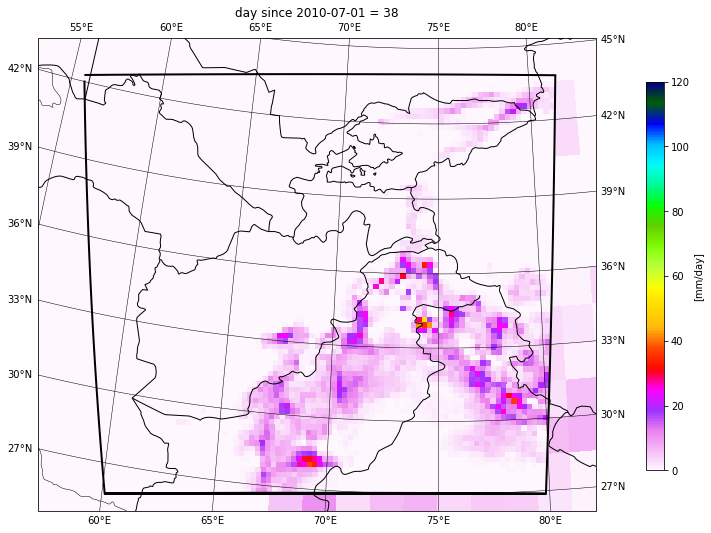

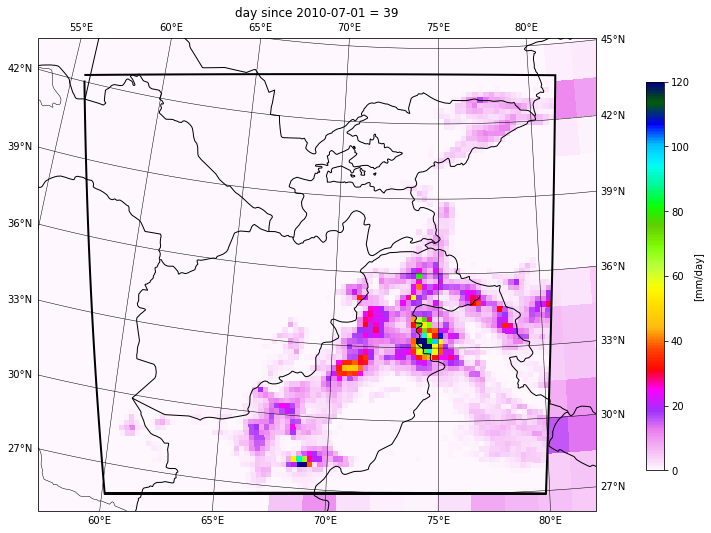

In [23]:
#-- Create the color mesh plot:

import cartopy.feature as cf
projection=ccrs.Orthographic(central_latitude=45.0, central_longitude=75.0)

for i in range(24,39):
#for i in range(27,28):
    

    fig, ax = plt.subplots(subplot_kw=dict(projection=projection), figsize=(10,9))
    
    ax.set_global()
    #-- add coastal outlines
    ax.add_feature(cfeature.COASTLINE.with_scale('50m'), linewidth=0.5)
    gl = ax.gridlines(draw_labels=True, linewidth=0.5, color='k', zorder=3)
    gl.xlabel_style = {'size':10}
    gl.ylabel_style = {'size':10}
    gl.top_labels   = True
    gl.right_labels = True
    
    #-- plot the title string
    plt.title('day since 2010-07-01 = ' +str(i+1))
    #-- define color map
    cmap = 'gist_ncar_r'
    #-- create the color mesh plot
    #edgecolor = [0.0, 0.0, 0.0, 0.2] #'k'
    edgecolor='none'
    linewidth = .01
    cyclic_data, cyclic_lon = cutil.add_cyclic_point(var1[i,::2,::2], coord=lon[::2])
    cnf1  = ax.pcolormesh(cyclic_lon, lat[::2], cyclic_data,
                          cmap=cmap,
                          vmin=0,
                          vmax=120,
                          edgecolor=edgecolor,
                          linewidth=linewidth,
                          transform=ccrs.PlateCarree(), shading='flat')
    
    cnf2 = ax.pcolormesh(lon2d, lat2d, var2[i,:,:],
                         cmap=cmap,
                         vmin=0,
                         vmax=120,
                         transform=ccrs.PlateCarree())
    ##-- add a polyline around the regional grid
    lw, ec, fc = 2, 'k', 'none'     #-- linewidth, edgecolor, facecolor
    ax.add_patch(mpatches.Polygon(polyline,
                                  closed=False,
                                  fill=False,
                                  linewidth=lw,
                                  edgecolor=ec,
                                  facecolor=fc,
                                  transform=ccrs.Geodetic()))
    ##ax.set_extent((50,90,19,50), crs = ccrs.PlateCarree())
    ax.set_extent((57,82,26,44), crs = ccrs.PlateCarree())
    
    #-- add a color bar
    cbar_ax = fig.add_axes([0.97, 0.20, 0.025, 0.6], autoscalex_on=True)  #-- x,y,w,h
    cbar    = fig.colorbar(cnf1, cax=cbar_ax, orientation='vertical')
    plt.setp(cbar.ax.get_xticklabels()[::10], visible=False)
    cbar.set_label('[mm/day]')
    ax.add_feature(cf.BORDERS)
    if (i <10 ) & (i<100):
        plt.savefig('figs/dynamical_CCLM_00'+str(i)+'.png', bbox_inches='tight', dpi=300)
    elif (i>9) & (i<100) :
        plt.savefig('figs/dynamical_CCLM_0'+str(i)+'.png', bbox_inches='tight', dpi=300)
    else:
        plt.savefig('figs/dynamical_CCLM_'+str(i)+'.png', bbox_inches='tight', dpi=300)
        
    
    

In [14]:
lon.shape

(61, 52)